In [1]:
import pandas as pd
import numpy as np
import logging
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('chronic_kidney_disease.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df1): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df1.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

In [4]:
#error-handling to prevent abnormal termination of code
try:
      
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(df.shape))
    print('Total number of records in dataset = ' + str(df.shape[0]))
    print('Total number of attributes in dataset = ' + str(df.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(df)
    #Missing value imputation
    #replace ? to nan values
    df=df.replace('?', np.nan)
    
    #set the features and the target variables
        #set the features and the target variables
    target_class = df['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = df.iloc[:, 0:24]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    
    #split the dataset into training and testing data
    train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.8, test_size = 0.2)
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(train_target.shape[0]))
    print('Size of test dataset: ' + str(test_target.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)


Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
p

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


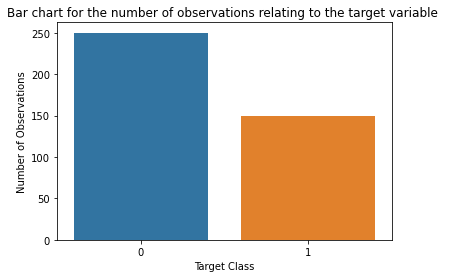

In [5]:
#Target class Visualisatiom

#graph a count plot to check the number of observations relative to the target variable
sns.countplot(pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target Class')
plt.ylabel('Number of Observations')
plt.show()

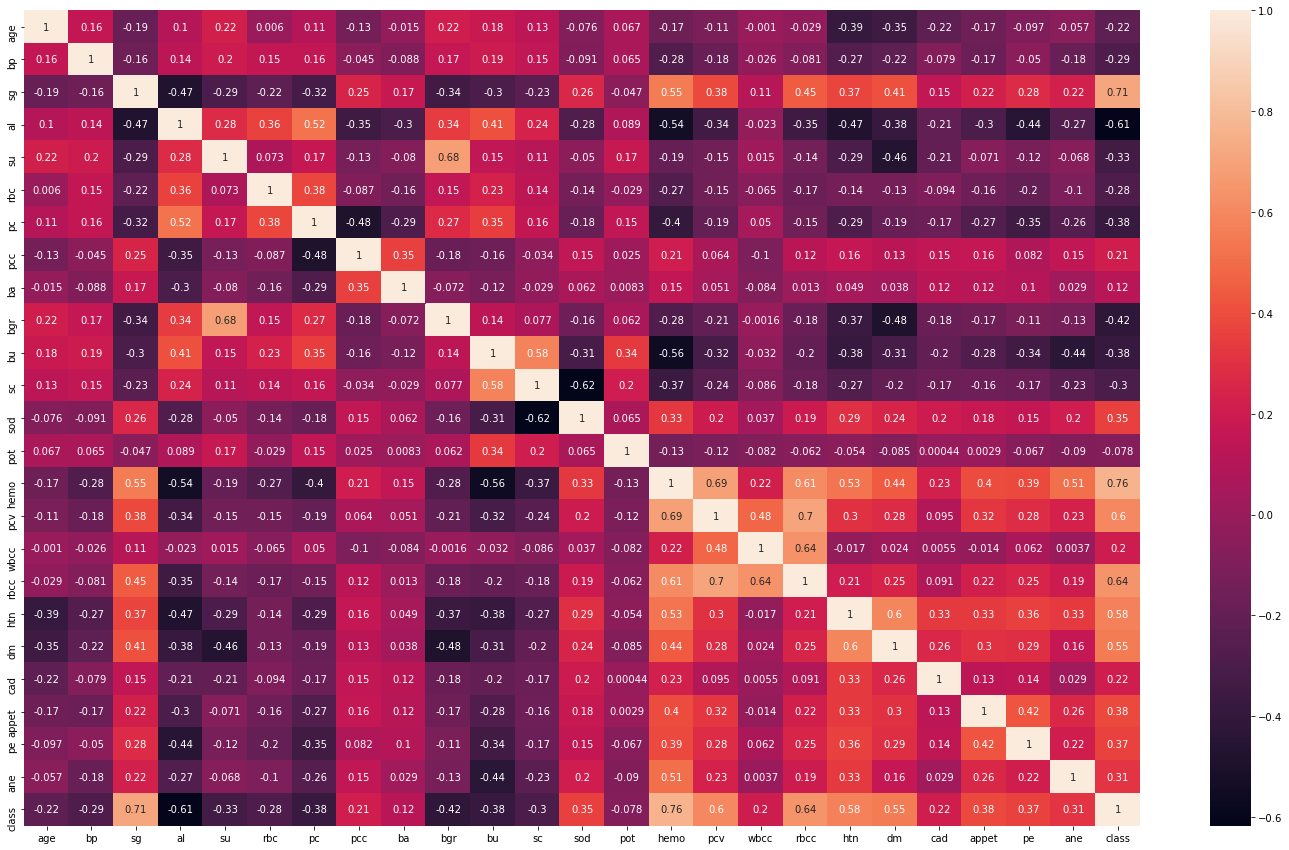



Based on the above plot, Hemoglobin (hemo) and Specific Gravity (sg) have the two highest correlation with the target variable respectively. However, no variables will be discarded for the purpose of this assessment.


In [6]:
plt.figure(figsize=(25,15)) 
sns.heatmap(pd.concat([feature_classes, target_class1], axis=1, sort=False).corr(), annot=True)
plt.show()

print('\n\nBased on the above plot, Hemoglobin (hemo) and Specific Gravity (sg) have the two highest \
correlation with the target variable respectively. However, no variables will be discarded for the \
purpose of this assessment.')

The best parameters are:
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=0.1, kernel='linear', random_state=0)

Precision: 1.0
Accuracy: 0.975
Recall: 0.9411764705882353
F1-score: 0.9696969696969697

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       1.00      0.94      0.97        34

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


Confusion Matrix: 
[[46  0]
 [ 2 32]]


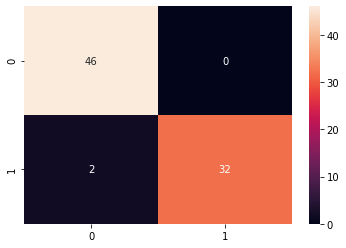

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(test_features)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 60}

The best model after gridsearch is:
 RandomForestClassifier(n_estimators=60, random_state=0)

Precision: 1.0
Accuracy: 0.975
Recall: 0.9411764705882353
F1-score: 0.9696969696969697

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       1.00      0.94      0.97        34

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


Confusion Matrix: 
[[46  0]
 [ 2 32]]


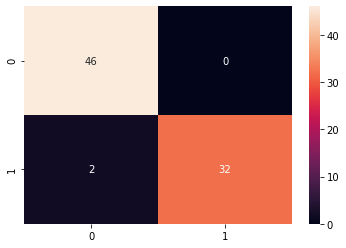

In [8]:
from sklearn.ensemble import RandomForestClassifier

#initialise the random forest Model
random_forest_model = RandomForestClassifier(random_state = 0)

#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100], 
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
rf_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rf_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

#Random Forest predictions on test features
rf_prediction = rf_grid_search.predict(test_features)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(test_target, rf_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, rf_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, rf_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, rf_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, rf_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, rf_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, rf_prediction), annot = True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(train_features,test_features)
predictions = gb_clf2.predict(test_features)

print("Confusion Matrix:")
print(confusion_matrix(test_target, predictions))

print("Classification Report")
print(classification_report(test_target, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [320, 80]

In [ ]:
#ann
conda search python

In [ ]:

pip install tensorflow


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import glob
import tensorflow as tf
from tensorflow import _pywrap_tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#build model

model = Sequential()

#first layer
model.add(Dense(256,input_dim= len(X.columns),kernel_initializer= k.initializers.random_normal(seed= 13),activation= 'relu'))

#second layer
model.add(Dense (1, activation = 'hard_sigmoid'))
#compiling the model
#opt = adam(lr=0.001, decay=1e-6)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#train the model

history = model.fit(train_features, train_target, epochs = 250, batch_size =train_features.shape[0])

In [ ]:
#xgboost


In [ ]:
!pip install xgboost

from xgboost import XGBClassifier

In [ ]:
classifier=XGBClassifier()
param={'learning_rate':[0.05,0.20,0.25],
       'max_depth':[5,8,10],
        'min_child_weight':[1,3,5,7],
         'gamma':[0.0,0.1,0.2,0.4],
         'colsample_bytree':[0.3,0.4,0.7]}